In [1]:
import numpy as np
from tqdm import tqdm
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
del_wake_data = Path(r'..\dataset\del_wake')

dirs = [_dir.name for _dir in del_wake_data.iterdir()]
print(dirs)

['apnea-ecg-database-npz', 'mesa', 'MrOS_visit1', 'MrOS_visit2', 'shhs1', 'shhs2']


In [3]:
def check_length(signal):
    length = len(signal)
    hr = length//360000
    if hr > 12:
        hr = 12
    return hr

def check_AHI(AHI):
    ahi = int(AHI)
    if ahi > 100:
        ahi = 100
    return ahi

In [4]:
def summary_len(numbers, x_start=0):
    plt.figure(figsize=(10, 5))
    width = 0.12
    
    for i in range(len(dirs)):
        x_value = [x+x_start for x in range(len(numbers[i]))]
        plt.bar([x+i*width for x in x_value], numbers[i], width=width)
        xticks_label = [f'{x}~{x+1}' for x in x_value[:-1]]+[f'{x_value[-1]}~']
        plt.xticks([x+2.5*width for x in x_value], xticks_label)
        
    plt.xlabel('Length (hr)')
    plt.ylabel('Numbers')
    plt.legend(dirs)
    plt.tight_layout()
    plt.show()
    
def summary_AHI(numbers):
    plt.figure(figsize=(10, 5))
    width = 0.12
    
    for i in range(2):
        plt.subplot(1, 2, i+1)
        for j in range(len(dirs)):  
            new_numbers = []
            if i == 0:
                new_numbers.append(sum(numbers[j][:5]))
                new_numbers.append(sum(numbers[j][5:15]))
                new_numbers.append(sum(numbers[j][15:30]))
                new_numbers.append(sum(numbers[j][30:50]))
            else:
                new_numbers.append(sum(numbers[j][50:60]))
                new_numbers.append(sum(numbers[j][60:70]))
                new_numbers.append(sum(numbers[j][70:80]))
                new_numbers.append(sum(numbers[j][80:90]))
                new_numbers.append(sum(numbers[j][90:100]))
                new_numbers.append(numbers[j][100])
                
            x_value = list(range(len(new_numbers)))
            plt.bar([x+j*width for x in x_value], new_numbers, width=width)
            if i == 0:
                xticks_label = ['0~5', '5~15', '15~30', '30~50']
            else:
                xticks_label = ['50~60', '60~70', '70~80', '80~90', '90~100', '100~']
            plt.xticks([x+2.5*width for x in x_value], xticks_label)
        
        plt.xlabel('AHI')
        plt.ylabel('Numbers')
        plt.legend(dirs)
    plt.tight_layout()
    plt.show()

shhs2: 100%|███████████████████████████████████████████████████████████████████████| 2651/2651 [03:53<00:00, 11.35it/s]


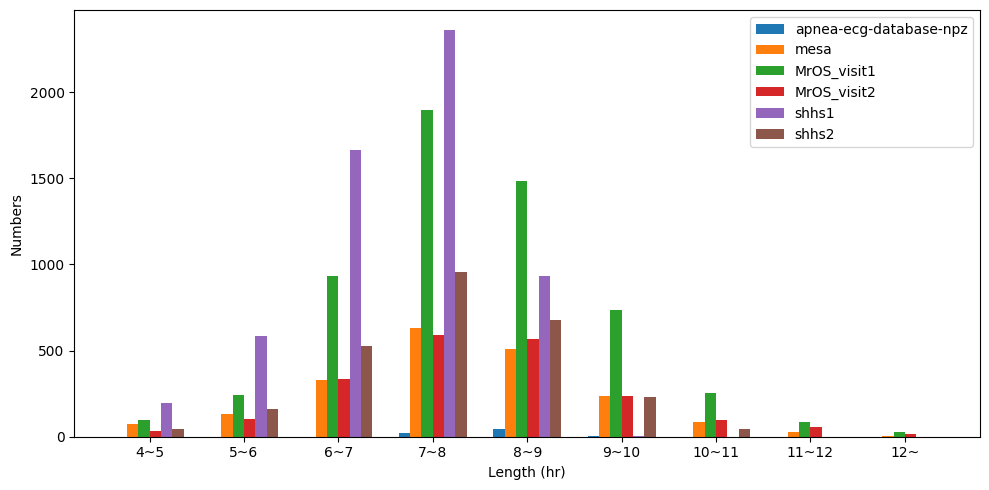

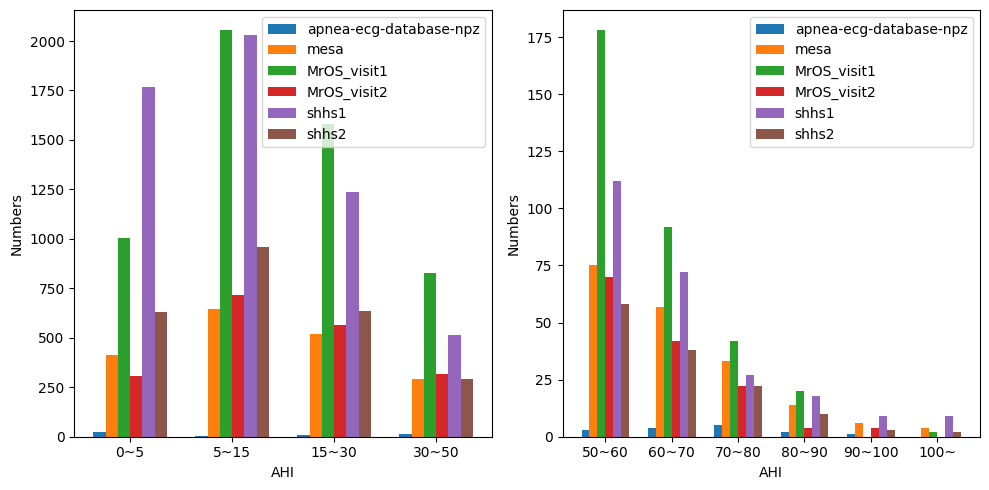

In [5]:
# delete wake data
len_list = []
ahi_list = []

for _dir in dirs:
    ahi_max = 0.
    length = [0 for i in range(13)]
    AHI = [0 for i in range(101)]
    
    files = [str(file) for file in (del_wake_data/_dir).glob('*.npz')]
    for file in tqdm(files, desc=f'{_dir}'):
        data = np.load(file, allow_pickle=True)
        signal = data['ECG']

        if 'mros' in file:
            ahi = float(data['csv_data'].item()['poahi3'])
        elif 'apnea-ecg-database' in file:
            ahi = float(data['AHI'])
        else:
            ahi = float(data['csv_data'].item()['ahi_a0h3'])
        
        if ahi > ahi_max:
            ahi_max = ahi
        length[check_length(signal)] += 1
        AHI[check_AHI(ahi)] += 1

    len_list.append(length[4:])
    ahi_list.append(AHI)
    
summary_len(len_list, 4)
summary_AHI(ahi_list)